<a href="https://colab.research.google.com/github/mikeCode321/FetchMoreLanguageModel/blob/bigram_representation/fetchmore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os, sys, time, math, argparse
from dataclasses import dataclass
from typing import List
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.nn import functional as F
from torch.utils.data import Dataset
from torch.utils.data.dataloader import DataLoader
from torch.utils.tensorboard import SummaryWriter

In [ ]:
words = open('names.txt', 'r').read().splitlines()

In [ ]:
words[:5]

['emma', 'olivia', 'ava', 'isabella', 'sophia']

In [ ]:
len(words)

32033

In [ ]:
min(len(w) for w in words)

2

In [ ]:
max(len(w) for w in words)

15

In [ ]:
b = {}
for w in words:
  chs = ['<S>'] + list(w) + ['<E>']
  for ch1, ch2 in zip(chs, chs[1:]):
    bigram = (ch1, ch2)
    b[bigram] = b.get(bigram, 0) + 1

In [ ]:
b = sorted(b.items(), key = lambda kv: -kv[1])

In [ ]:
N = torch.zeros((28,28), dtype=torch.int32)

In [ ]:
chrs = sorted(list(set(''.join(words))))

In [ ]:
string_to_int = {s:i+1 for i,s in enumerate(chrs)}
string_to_int['<S>'] = 0
string_to_int['<E>'] = 27

In [ ]:
int_to_string = {i:s for s, i in string_to_int.items()}

In [ ]:
for w in words:
  chs = ['<S>'] + list(w) + ['<E>']
  for ch1, ch2 in zip(chs, chs[1:]):
    idx1 = string_to_int[ch1]
    idx2 = string_to_int[ch2]
    N[idx1, idx2] += 1

In [ ]:
b[0]

(('n', '<E>'), 6763)

In [ ]:
N[string_to_int[b[0][0][0]]]

tensor([   0, 2977,    8,  213,  704, 1359,   11,  273,   26, 1725,   44,   58,
         195,   19, 1906,  496,    5,    2,   44,  278,  443,   96,   55,   11,
           6,  465,  145, 6763], dtype=torch.int32)

(-0.5, 27.5, 27.5, -0.5)

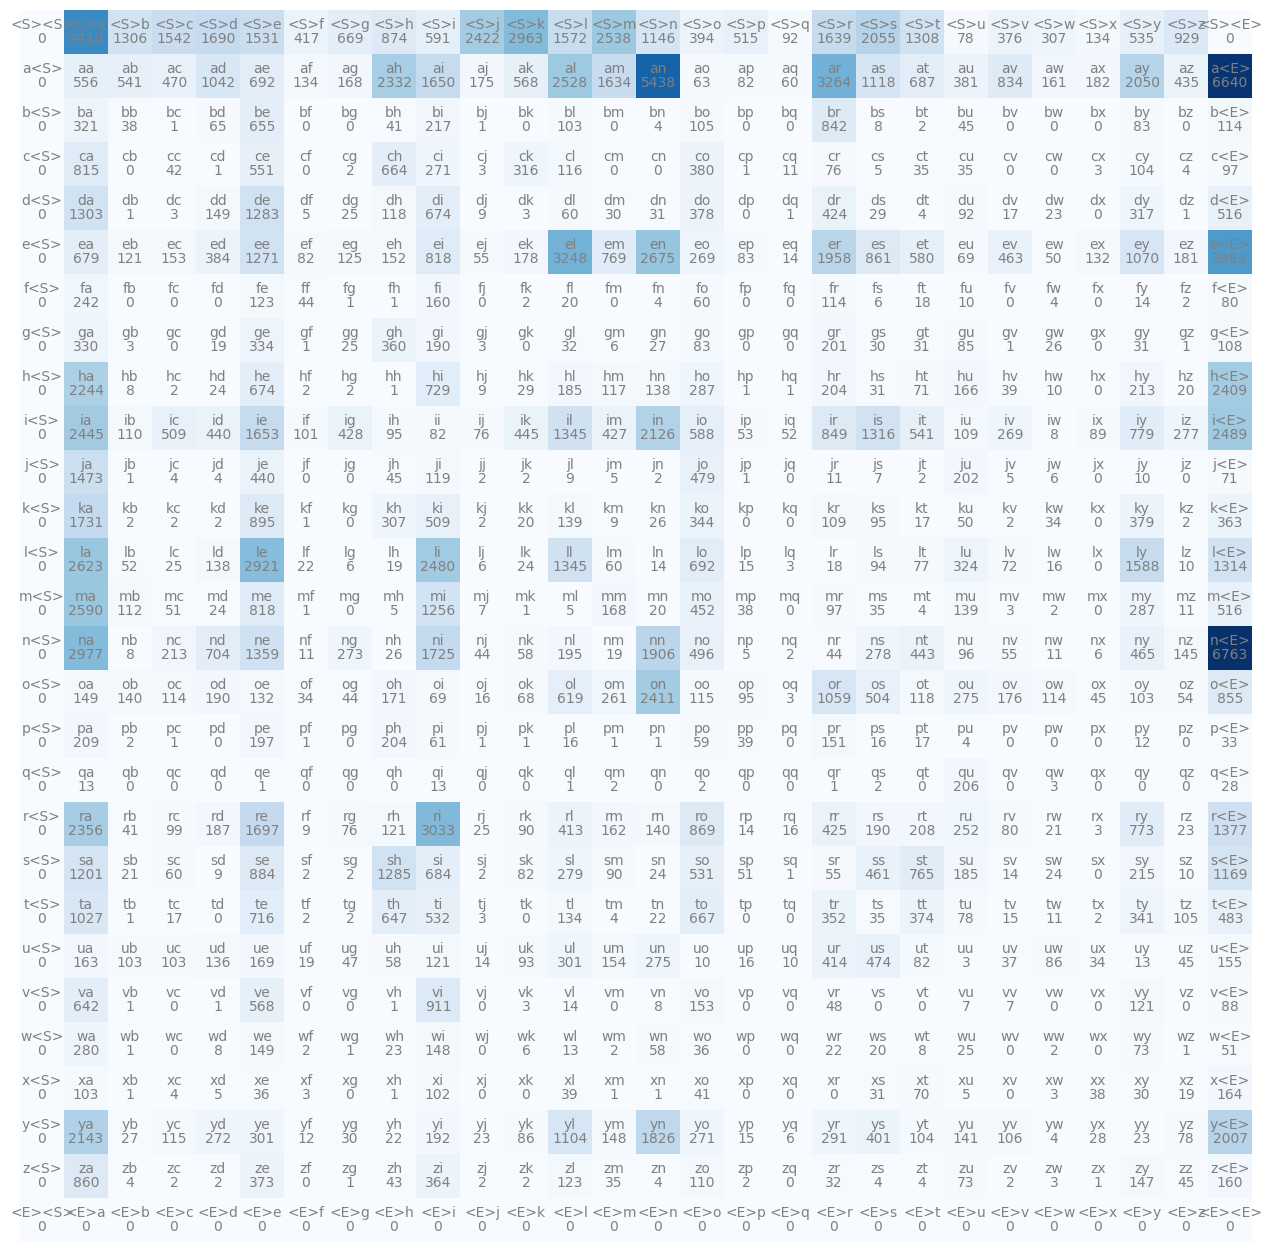

In [ ]:
plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(28):
  for j in range(28):
    chstr = int_to_string[i] + int_to_string[j]
    plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
    plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off')